In [70]:
!pip install git+https://github.com/openai/CLIP.git
!wget https://people.eecs.berkeley.edu/~efros/img/Efros__photo_Peter_Badge_crop.jpg
!mv Efros__photo_Peter_Badge_crop.jpg efros.jpg

--2021-09-16 22:05:08--  https://people.eecs.berkeley.edu/~efros/img/Efros__photo_Peter_Badge_crop.jpg
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456031 (445K) [image/jpeg]
Saving to: ‘Efros__photo_Peter_Badge_crop.jpg’

Efros__photo_Peter_ 100%[===================>] 445.34K  1.75MB/s    in 0.2s    

2021-09-16 22:05:08 (1.75 MB/s) - ‘Efros__photo_Peter_Badge_crop.jpg’ saved [456031/456031]



In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import annotations

In [2]:
import copy
import os
from time import perf_counter
import click
import imageio
import numpy as np
import PIL.Image
import torch
import torch.nn.functional as F
import einops

import dnnlib
import legacy

from projector import *

/home/oleksiiv/anaconda3/envs/ganenvem1/lib/python3.9/site-packages/clip/clip.py:23: UserWarning: PyTorch version 1.7.1 or higher is recommended
  warnings.warn("PyTorch version 1.7.1 or higher is recommended")


In [3]:
# network_pkl = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
network_pkl = "https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-car-config-f.pkl"
target_fname = "efros.jpg"
outdir = "out"
save_video = True
seed = 202
np.random.seed(seed)
torch.manual_seed(seed)
num_steps = 200
device = torch.device('cuda')

In [4]:
generator = Generator(network_pkl, normalize_latent="all_dims", device=device, latent_space="w")
prior = DiffusionPrior(device)
prior.load_network("/home/oleksiiv/logs/ominous-wraith-125/epoch_2000_ckpt.pth")

Setting up PyTorch plugin "bias_act_plugin"... Done.
Normalizing across all channels.
Using group norm group size = 32.
<All keys matched successfully>


In [5]:

blue_target = torch.cat((torch.zeros(2, 512, 512), 255*torch.ones(1, 512, 512)), 0)
task = Task(device=device, target=blue_target)

projector = Projector(generator, task, prior=prior, device=device)

# Optimize projection.
start_time = perf_counter()

# later TODO mem optimization -> mixed precision, gradient checkpointing, multiGPU 
projected_w_steps = projector.project(
    num_images=6,
    num_steps=100,
)

print (f'Elapsed: {(perf_counter()-start_time):.1f} s')

torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/100: prior_loss 0.00  task_loss 4.66 
torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
step    2/100: prior_loss 0.00  task_loss 4.68 
torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
step    3/100: prior_loss 0.00  task_loss 4.63 
torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
step    4/100: prior_loss 0.00  task_loss 4.56 
torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
step    5/100: prior_loss 0.00  task_loss 4.47 
torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
step    6/100: prior_loss 0.00  task_loss 4.34 
torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
step    7/100: prior_loss 0.00  task_loss 4.19 
torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
step    8/100: prior_loss 0.00  task_loss 4.10 
torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
step    9/100: prior_loss 0.00  task_loss 4.02 
torch.Size([6, 1, 512])
torch.Size([6, 1, 512])
step   10/100: prior_loss 0.00  ta

In [4]:
gen = Generator(network_pkl, latent_space='w+', device=device)
prior = Prior(gen, device=device, prior_type='l2', regularize_w_l2=0.05)

blue_target = torch.cat((torch.zeros(2, 512, 512), 255*torch.ones(1, 512, 512)), 0)
task = Task(device=device, target=blue_target)
projector = Projector(gen, task, prior=prior, device=device)

# Optimize projection.
start_time = perf_counter()

# later TODO mem optimization -> mixed precision, gradient checkpointing, multiGPU 
projected_w_steps = projector.project(
    num_images=6,
    num_steps=100,
)

print (f'Elapsed: {(perf_counter()-start_time):.1f} s')

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/home/oleksiiv/anaconda3/envs/ganenv8/lib/python3.9/site-packages/torch/nn/modules/module.py:1051: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return forward_call(*input, **kwargs)


Done.
step    1/100: prior_loss 1669.74 task_loss 4.70 
step    2/100: prior_loss 1669.74 task_loss 4.70 
step    3/100: prior_loss 1617.49 task_loss 4.69 
step    4/100: prior_loss 1518.80 task_loss 4.69 
step    5/100: prior_loss 1384.58 task_loss 4.69 
step    6/100: prior_loss 1228.99 task_loss 4.68 
step    7/100: prior_loss 1066.99 task_loss 4.66 
step    8/100: prior_loss 934.77 task_loss 4.67 
step    9/100: prior_loss 825.99 task_loss 4.66 
step   10/100: prior_loss 735.29 task_loss 4.66 
step   11/100: prior_loss 658.44 task_loss 4.67 
step   12/100: prior_loss 592.26 task_loss 4.66 
step   13/100: prior_loss 534.34 task_loss 4.66 
step   14/100: prior_loss 483.01 task_loss 4.66 
step   15/100: prior_loss 437.08 task_loss 4.65 
step   16/100: prior_loss 395.74 task_loss 4.63 
step   17/100: prior_loss 358.43 task_loss 4.60 
step   18/100: prior_loss 324.71 task_loss 4.57 
step   19/100: prior_loss 294.24 task_loss 4.54 
step   20/100: prior_loss 266.70 task_loss 4.51 
step   

In [8]:
gen = Generator(network_pkl, latent_space='w+', device=device)
prior = Prior(gen, device=device, prior_type='cluster', regularize_cluster_weight=0.01)

blue_target = torch.cat((torch.zeros(2, 512, 512), 255*torch.ones(1, 512, 512)), 0)
task = Task(device=device, target=blue_target)
projector = Projector(gen, task, prior=prior, device=device)

# Optimize projection.
start_time = perf_counter()

# later TODO mem optimization -> mixed precision, gradient checkpointing, multiGPU 
projected_w_steps = projector.project(
    num_images=6,
    num_steps=100,
)

print (f'Elapsed: {(perf_counter()-start_time):.1f} s')

running k-means on cuda..


[running kmeans]: 58it [00:59,  1.02s/it, center_shift=0.000000, iteration=58, tol=0.000100]


step    1/100: prior_loss 221.40 task_loss 4.72 
step    2/100: prior_loss 221.40 task_loss 4.72 
step    3/100: prior_loss 212.69 task_loss 4.69 
step    4/100: prior_loss 196.43 task_loss 4.61 
step    5/100: prior_loss 174.78 task_loss 4.42 
step    6/100: prior_loss 150.44 task_loss 4.26 
step    7/100: prior_loss 126.03 task_loss 4.12 
step    8/100: prior_loss 106.88 task_loss 4.05 
step    9/100: prior_loss 91.67 task_loss 3.96 
step   10/100: prior_loss 79.37 task_loss 3.89 
step   11/100: prior_loss 69.20 task_loss 3.83 
step   12/100: prior_loss 60.64 task_loss 3.79 
step   13/100: prior_loss 53.32 task_loss 3.74 
step   14/100: prior_loss 46.98 task_loss 3.70 
step   15/100: prior_loss 41.44 task_loss 3.66 
step   16/100: prior_loss 36.58 task_loss 3.63 
step   17/100: prior_loss 32.31 task_loss 3.61 
step   18/100: prior_loss 28.57 task_loss 3.58 
step   19/100: prior_loss 25.29 task_loss 3.56 
step   20/100: prior_loss 22.41 task_loss 3.54 
step   21/100: prior_loss 19.89 

In [35]:
gen = Generator(network_pkl, latent_space='z+', device=device)
task = Task(device=device, task_type = 'clip_text', target_str = 'racecar')
prior = Prior(gen, device=device, prior_type='cluster', regularize_cluster_weight=1.5, cluster_samples=2000)
projector = Projector(gen, task, prior=prior, device=device)

# Optimize projection.
start_time = perf_counter()

# later TODO mem optimization -> mixed precision, gradient checkpointing, multiGPU 
projected_w_steps = projector.project(
    num_images=12,
    num_steps=100,
)

print (f'Elapsed: {(perf_counter()-start_time):.1f} s')

running k-means on cuda..


[running kmeans]: 108it [00:21,  5.02it/s, center_shift=0.000000, iteration=108, tol=0.000100]


step    1/100: prior_loss 141760.52 task_loss 9.03 
step    2/100: prior_loss 141760.52 task_loss 8.99 
step    3/100: prior_loss 137204.35 task_loss 9.02 
step    4/100: prior_loss 128445.52 task_loss 8.98 
step    5/100: prior_loss 116174.78 task_loss 9.00 
step    6/100: prior_loss 101363.99 task_loss 9.05 
step    7/100: prior_loss 85179.39 task_loss 9.01 
step    8/100: prior_loss 71358.27 task_loss 8.95 
step    9/100: prior_loss 59644.76 task_loss 8.92 
step   10/100: prior_loss 49784.50 task_loss 8.96 
step   11/100: prior_loss 41538.85 task_loss 9.02 
step   12/100: prior_loss 34685.85 task_loss 9.00 
step   13/100: prior_loss 29021.61 task_loss 9.05 
step   14/100: prior_loss 24363.93 task_loss 9.06 
step   15/100: prior_loss 20549.63 task_loss 9.02 
step   16/100: prior_loss 17436.30 task_loss 9.09 
step   17/100: prior_loss 14900.57 task_loss 9.09 
step   18/100: prior_loss 12835.36 task_loss 9.05 
step   19/100: prior_loss 11151.67 task_loss 9.05 
step   20/100: prior_loss

In [9]:
gen = Generator(network_pkl, latent_space='z+', device=device)
# prior = Prior(gen, device=device, prior_type='cluster', regularize_cluster_weight=1.5, cluster_samples=2000)
prior = None
blue_target = torch.cat((torch.zeros(2, 512, 512), 255*torch.ones(1, 512, 512)), 0)
task = Task(device=device, target=blue_target)
projector = Projector(gen, task, prior=prior, device=device)

# Optimize projection.
start_time = perf_counter()

# later TODO mem optimization -> mixed precision, gradient checkpointing, multiGPU 
projected_w_steps = projector.project(
    num_images=12,
    num_steps=100,
)

print (f'Elapsed: {(perf_counter()-start_time):.1f} s')

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/100: prior_loss 0.00  task_loss 9.26 
step    2/100: prior_loss 0.00  task_loss 9.27 
step    3/100: prior_loss 0.00  task_loss 8.56 
step    4/100: prior_loss 0.00  task_loss 8.01 
step    5/100: prior_loss 0.00  task_loss 7.51 
step    6/100: prior_loss 0.00  task_loss 7.08 
step    7/100: prior_loss 0.00  task_loss 6.70 
step    8/100: prior_loss 0.00  task_loss 6.33 
step    9/100: prior_loss 0.00  task_loss 5.96 
step   10/100: prior_loss 0.00  task_loss 5.61 
step   11/100: prior_loss 0.00  task_loss 5.36 
step   12/100: prior_loss 0.00  task_loss 5.17 
step   13/100: prior_loss 0.00  task_loss 4.97 
step   14/100: prior_loss 0.00  task_loss 4.78 
step   15/100: prior_loss 0.00  task_loss 4.56 
step   16/100: prior_loss 0.00  task_loss 4.41 
step   17/100: prior_loss 0.00  task_loss 4.26 
step   18/100: prior_loss 0.00  task_loss 4.14 
step   19/100: prior_loss 0.0

In [7]:
outdir

'out'

In [8]:
# Render debug output: optional video and projected image and W vector.
num_rows = 3
os.makedirs(outdir, exist_ok=True)
with torch.no_grad():
    if save_video:
        video = imageio.get_writer(f'{outdir}/test.mp4', mode='I', fps=10, codec='libx264', bitrate='1M')
        print (f'Saving optimization progress video "{outdir}/test.mp4"')
        for projected_w in projected_w_steps:
            synth_image = projector.gen.latent_to_image(projected_w)
            synth_image = (synth_image + 1) * (255/2)
            synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8).cpu().numpy()
            grid_image = einops.rearrange(synth_image, "(n1 n2) h w c-> (n1 h) (n2 w) c", n1=num_rows)
            video.append_data(grid_image)
            # video.append_data(np.concatenate([target_uint8, synth_image], axis=1))
        video.close()

Saving optimization progress video "out/test.mp4"


In [ ]:
# Save final projected frame and W vector.
target_pil.save(f'{outdir}/target.png')
projected_w = projected_w_steps[-1]
synth_image = G.synthesis(projected_w.unsqueeze(0), noise_mode='none')
synth_image = (synth_image + 1) * (255/2)
synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
PIL.Image.fromarray(synth_image, 'RGB').save(f'{outdir}/projblue.png')
np.savez(f'{outdir}/projected_wblue.npz', w=projected_w.unsqueeze(0).cpu().numpy())

In [1]:
from __future__ import annotations
import wandb
import argparse

import imageio
import torch
from projector import *
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import numpy as np
from score import ScoreTrainer
import os
import matplotlib.pyplot as plt
import einops

In [2]:
class Args:
    hidden_dim = 2048
    network_pkl = "https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-car-config-f.pkl"
    latent_space = 'w'
    batch_size = 64
    lr = 1e-4
    num_epochs = 500
    data = 'gan'
    sigma = 25
    max_t = 1

In [3]:
device = 'cuda'

args = Args

generator = Generator(args.network_pkl, device=device, latent_space=args.latent_space)

trainer = ScoreTrainer(args, device=device, sigma=args.sigma, im_width=1, im_height=512)
trainer.load_network("/home/oleksiiv/logs/light-dream-44/ckpt.pth")
# trainer.train(args.data, args.num_epochs, args.batch_size, args.lr, generator, max_t=args.max_t)

In [22]:
num_samples = 5 ** 2
num_steps = 100

samples = trainer.pc_sampler_seq(num_steps=num_steps, batch_size=num_samples)[:, :, 0] # 100, 16, 1, 1, 512 -> 100, 16, 1, 512
outdir = "out"

num_rows = 5
os.makedirs(outdir, exist_ok=True)
with torch.no_grad():
    video = imageio.get_writer(f'{outdir}/gan_w_test.mp4', mode='I', fps=25, codec='libx264', bitrate='16M')
    print (f'Saving optimization progress video "{outdir}/gan_w_test.mp4"')
    for i in range(num_steps):
        sub_samples = samples[i]
        ims = generator.latent_to_image(sub_samples)*255
        ims = ims.clamp(0, 255).permute(0, 2, 3, 1).to(torch.uint8).cpu().numpy()
        grid_image = einops.rearrange(ims, "(n1 n2) h w c-> (n1 h) (n2 w) c", n1=num_rows)
        video.append_data(grid_image)
        # video.append_data(np.concatenate([target_uint8, synth_image], axis=1))
    video.close()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 243.67it/s]


Saving optimization progress video "out/gan_w_test.mp4"


In [16]:
samples = trainer.pc_sampler(num_steps=num_steps, batch_size=num_samples)
ims = generator.latent_to_image(samples[:,0])*255
ims = ims.clamp(0, 255).permute(0, 2, 3, 1).to(torch.uint8).cpu().numpy()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.32it/s]


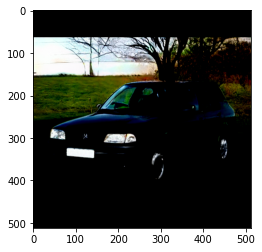

In [17]:
from matplotlib import pyplot as plt
plt.imshow(ims[0])
plt.show()

In [15]:
ims[0].max()

1

In [1]:
!nvidia-smi

Mon Oct 11 14:14:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 460.27.04    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     On   | 00000000:41:00.0 Off |                  Off |
| 33%   38C    P0    86W / 260W |      0MiB / 48601MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------